# Rotation d'image par un algorithme diviser pour régner

## Utilisation du module PIL

Dans ce notebook, nous allons utiliser le module de traitement d'image PIL. Voyons quelques commades élémentaires qui nous sserons utile par la suite.

#### Ouvrir un fichier, créer une image

In [2]:
from PIL import Image

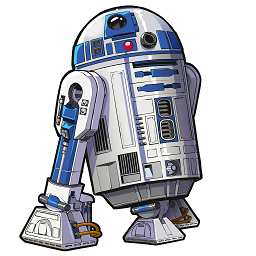

In [52]:
#création d'une image dans PIL à partir d'un fichier png, jpg, bmp
im = Image.open("r2d2_256.png")
#Pour afficher l'image dans le notebook, il suffit de l'appeler en dernière ligne de la cellule :
im

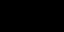

In [32]:
#création d'une image vierge de 64px * 32px
imNew = Image.new('RGB', (64, 32))
#Cette image est vierge donc totalement noire
imNew

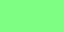

In [37]:
#on peut également lui spécifier une couleur par un argument supplémentaire : un tuple (R, V, B)
imNew2 = Image.new('RGB', (64, 32), (127, 255, 127))
#Cette image est vierge donc totalement noire
imNew2

In [25]:
#on peut afficher la taile d'un image de la manière suivante :
largeur, hauteur = imNew.size
print(largeur, hauteur)

64 32


#### Lire et changer la couleur d'un pixel

Les coordonnées d'un pixel sont référencées sur un repère (x, y) comme ci-dessous : attention, à la direction de l'axe y et à l'origine de l'image en haut à gauche.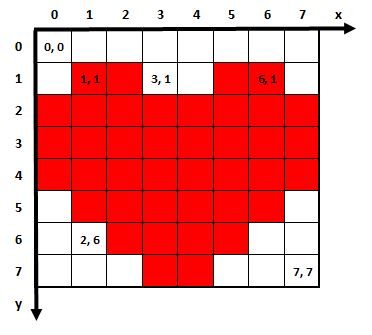

In [20]:
#cette commande permet de lire la couleur d'un pixel. Les coordonnées sont fournie sous forme d'un tuple (R, V, B), 
#notez bien la syntaxe avec les doubles parenthèses.
im.getpixel((130,25))

(50, 91, 170)

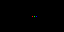

In [22]:
#pour changer la couleur d'un pixel
#la couleur est envoyée sous forme d'un tuple (R, V, B).
#Chaque composante RVB est codée sur 8b (0 à 255)
imNew.putpixel((32, 16), (255, 0, 0))
imNew.putpixel((34, 16), (0, 255, 0))
imNew.putpixel((36, 16), (0, 0, 255))
imNew

#### A vous de jouer ! ####  
- Créez une image carrée de 64px de coté entierement jaune (255, 255, 0)
- Dessinez en haut à gauche  un carré violet (255, 0, 255) de 16 pixels de coté.
- Dessinez en plein milieu un carré bleu de 32 pixels de coté.  

Comme ceci :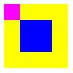

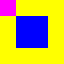

In [44]:
imNew3 = Image.new('RGB', (64, 64), (255, 255, 0))
for x in range(16):
    for y in range(16):
        imNew3.putpixel((x, y), (255, 0, 255))
for dx in range(32):
    for dy in range(32):
        imNew3.putpixel((16 + dx, 16 + dy), (0, 0, 255))
imNew3

#### Découper une image

Pour découper, il faut utiliser la méthode crop((x1, y1, x2, y2)) ou x1, y1 sont les coordonnées du coin en haut à gauche et x2, y2 les coordonnées du coin en bas à droite.


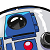

In [24]:
imC = im.crop((100, 0, 150, 50))
#imC est une nouvelle image
imC

#### Coller une image dans une autre

pour coller une image dans une autre, il faut appliquer la méthode **paste(imageAcoller, position)** sur l'image sur laquelle on veut coller, position est un tuple (x, y) qui correspond à la position de collage du coin en haut a gauche. Par défaut position vaut (0, 0).

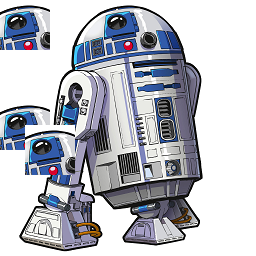

In [53]:
im.paste(imC)
im.paste(imC,(0, 100))
im.paste(imC,(25, 125))
im

## Rotation d'image : méthode naïve

La méthode naïve consiste à déplacer l'image pixel par pixel en utilisant une transformation adéquate.  
Lors d'une rotation d'un image carrée, de coté **n** pixels, dans le sens horaire de 90°, on peut calculer les nouvelles coordonnées (x<sub>r</sub>, y<sub>r</sub>) d'un pixel en connaissant ses coordonnées dans l'image initiale (x<sub>i</sub>, y<sub>i</sub>) avec la formule :  
**(x<sub>r</sub>, y<sub>r</sub>) = (n - 1 - y<sub>i</sub>, x<sub>i</sub>)**  
Par exemple, dans l'image suivante :

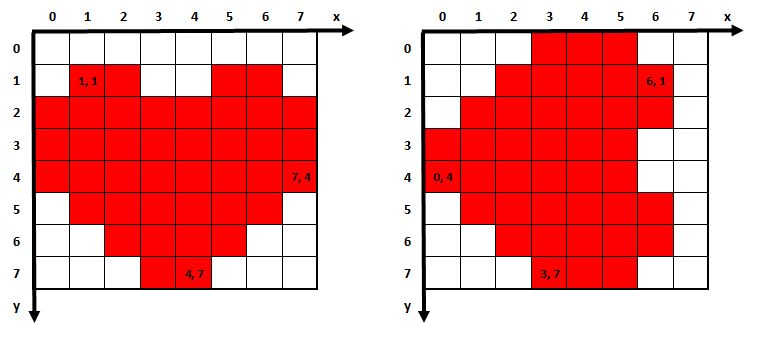

- le pixel (1, 1) se déplace aux coordonnées (8 - 1 - 1, 1) = (6, 1)
- le pixel (7, 4) se déplace aux coordonnées (8 - 1 - 4, 7) = (3, 7)
- le pixel (4, 7) se déplace aux coordonnées (8 - 1 - 7, 4) = (0, 4)

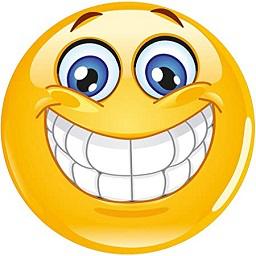

In [6]:
#une autre image pour les tests
im2 = Image.open("smiley_256.jpg")
im2

Proposez une fonction **rotationNaive(img)** qui réalise cette opération de rotation de 90° dans le sens horaire. Cette fonction est purement itérative.

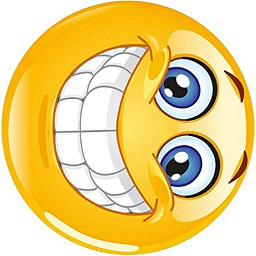

In [8]:
def rotationNaive(img):
    largeur, hauteur = img.size
    assert largeur == hauteur, "Cette fonction ne traite que les images carrées"
    imNew = Image.new('RGB', (largeur, hauteur))
    
    for x in range(largeur):
        for y in range(hauteur):
            imNew.putpixel((largeur - 1 - y, x), img.getpixel((x, y)))
    return imNew

rotationNaive(im2)


Utilisez la cellule suivante pour chronométrer votre fonction sur une image de 256px de coté.

In [28]:
from timeit import timeit

def test():
    rotationNaive(im2)
    
print(timeit(test, number = 1))

0.5760000000000218


## Par un algorithme diviser pour régner

Proposez un programme qui 
- découpe l'image en quatre carré de taille identique
- crée une nouvelle image vierge de la même taille que l'image de départ
- recombine les quatre carrés sur cette nouvelle image de la façon suivante :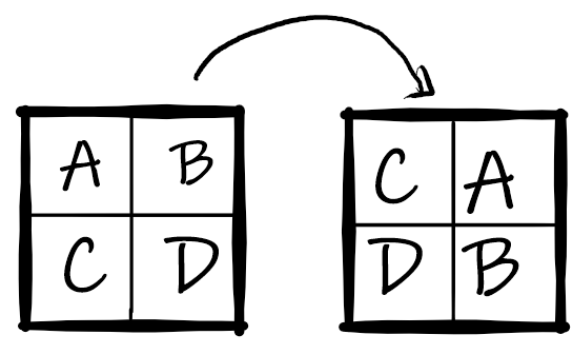

***Hypothèse :*** Les images sont toutes carrées, le nombre de pixels sur un coté est une puissance de 2.

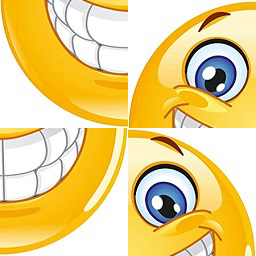

In [54]:
im2 = Image.open("smiley_256.jpg")

n, hauteur = im2.size

m = n // 2

#Découpe en quatre carrés
carreA = im2.crop((0, 0, m, m))
carreB = im2.crop((m, 0, n, m))
carreC = im2.crop((0, m, m, n))
carreD = im2.crop((m, m, n, n))       

#recombine l'image en faisant tourner les carrés
imNew = Image.new('RGB', (n, n))

imNew.paste(carreA, (m, 0))
imNew.paste(carreB, (m, m))
imNew.paste(carreC, (0, 0))
imNew.paste(carreD, (0, m))

imNew

Pour obtenir une rotation complète, il faut réappliquer la même opération récursivement à chaque carré ... Jusqu'à obtenir des carrés de 1px par 1px. Proposez une fonction **rotationDpR(img)** qui premd en argument une imape PIL et renvoi une image tournée de 90° dans le sens horaire.

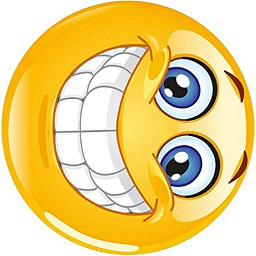

In [47]:
def rotationDpR(img):
    
    n, hauteur = img.size
    assert n == hauteur, "Cette fonction ne traite que les images carrées"

    #on relance la fonction sur les 4 morceaux
    m = n // 2

    #Découpe en quatre carrés
    carreA = img.crop((0, 0, m, m))
    carreB = img.crop((m, 0, n, m))
    carreC = img.crop((0, m, m, n))
    carreD = img.crop((m, m, n, n))       

    #on relance la fonction sur les 4 morceaux
    if m > 1:
        carreA = rotationDpR(carreA)
        carreB = rotationDpR(carreB)
        carreC = rotationDpR(carreC)
        carreD = rotationDpR(carreD)

    #recombine l'image en faisant tourner les carrés
    imNew = Image.new('RGB', (n, n))

    imNew.paste(carreA, (m, 0))
    imNew.paste(carreB, (m, m))
    imNew.paste(carreC, (0, 0))
    imNew.paste(carreD, (0, m))

    return imNew


rotationDpR(im2)

Utilisez la cellule suivante pour chronométrer votre fonction sur une image de 256px de coté.

In [30]:
from timeit import timeit

def test():
    rotationDpD(im2)
    
print(timeit(test, number = 1))

3.0779999999999745


Critiquez l'efficacité de la méthode dans ce cas.

#### Dans les deux sens

Proposez une nouvelle fonction qui accepte un argument supplémentaire reverse, optionnel, par défaut à False, qui, si il est fixé à True, permet d'obtenir une rotaion dans le sens anti-horaire.

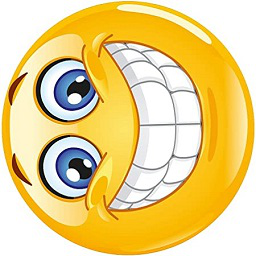

In [5]:
def rotationDpR2(img, reverse = False):
    
    n, hauteur = img.size
    assert n == hauteur, "Cette fonction ne traite que les images carrées"

    #on relance la fonction sur les 4 morceaux
    m = n // 2

    #Découpe en quatre carrés
    carreA = img.crop((0, 0, m, m))
    carreB = img.crop((m, 0, n, m))
    carreC = img.crop((0, m, m, n))
    carreD = img.crop((m, m, n, n))       

    #on relance la fonction sur les 4 morceaux
    if m > 1:
        carreA = rotationDpR2(carreA, reverse)
        carreB = rotationDpR2(carreB, reverse)
        carreC = rotationDpR2(carreC, reverse)
        carreD = rotationDpR2(carreD, reverse)

    #recombine l'image en faisant tourner les carrés
    imNew = Image.new('RGB', (n, n))
    
    if not reverse :
        imNew.paste(carreA, (m, 0))
        imNew.paste(carreB, (m, m))
        imNew.paste(carreC, (0, 0))
        imNew.paste(carreD, (0, m))
    else:
        imNew.paste(carreD, (m, 0))
        imNew.paste(carreC, (m, m))
        imNew.paste(carreB, (0, 0))
        imNew.paste(carreA, (0, m))       
        

    return imNew

im2 = Image.open("smiley_256.jpg")
rotationDpR2(im2, reverse = True)